# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2}-(1-\theta)\frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{\Delta x^2} = 0. $$ 
    

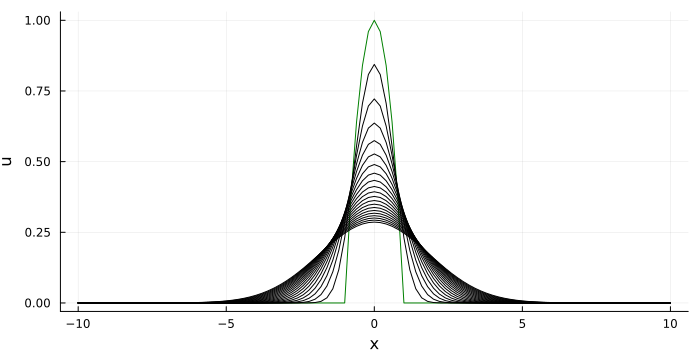

In [84]:
using LinearAlgebra, Plots

# Parameters
L = 10.0   
Nx=100
   
    # domain half size                               # grid size (space)
Δx =2*L/Nx                            # step size (space)    #on change les valeurs pour voir les modifications
σ = 0.2                # CFL
Δt = σ * Δx^2                          # step size (time)
Nt = 200                              # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)  # initial condition
teta=0.7
# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(-σ*teta*ones(Nx), -1 .+ 2*teta*σ*ones(Nx+1), -σ*teta*ones(Nx)) #matrice tridiagonale
A=Tridiagonal(σ*(1-teta)*ones(Nx),-1 .- σ*2*(1-teta)*ones(Nx+1),σ*(1-teta)*ones(Nx))
for n = 1:Nt
    u=A\(B*u)   
    if mod(n, Nt/20) == 0   #dessiner la soltion
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

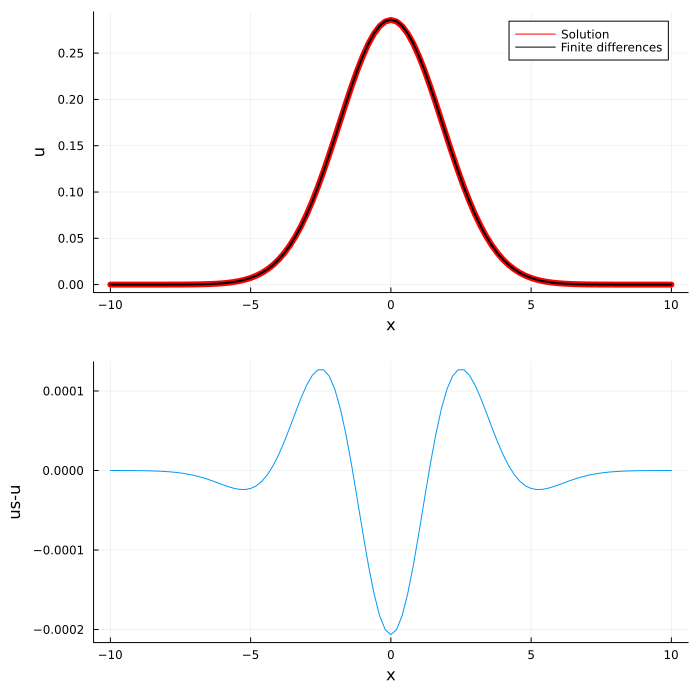

Δx: 0.2	 Δt:0.008000000000000002	 max error: 0.000206381937650435


In [85]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)                                                #construction de la solution exacte il ne faut pas le toucher
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )                       #on fait la difference entre les deux solution pour comparer
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")         # à cause de la condition cfl delta est trop petit

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

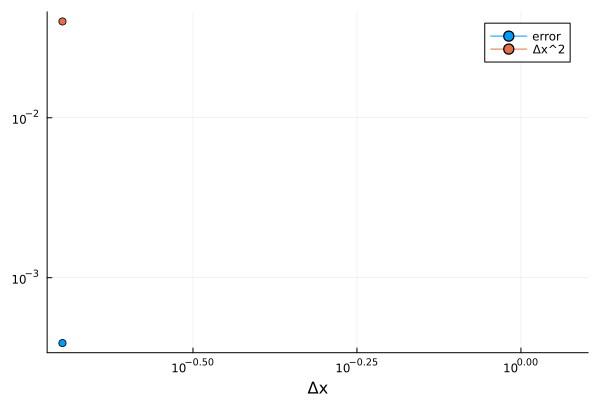

In [86]:
# Precision test               O(delta t) + O(delta x)
Δx = [ 0.2]                   #on fixe deta t très petit  =0.000001 dans le code de debut et faire decroitre delta x et on ajoute aussi d'autre valeuur pour avoir plus de point 
errx = [ 0.00039 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

# q4

POUR teta=0.2
pour sigma=0.2 :Δx: 0.2	 Δt:0.008000000000000002	 max error: 0.0006846966840798885
pour sigma=0.3 :Δx: 0.2	 Δt:0.012000000000000002	 max error: 0.0004730281293957306
pour sigma=0.4 : explose
pour sigma=0.51 : explose

Pour teta=0.5:
pour sigma=0.2 : Δx: 0.2	 Δt:0.008000000000000002	 max error: 0.00039727163047592606
pour sigma=0.3 : Δx: 0.2	 Δt:0.012000000000000002	 max error: 0.00022667053161595785
pour sigma=0.4 : explose
pour sigma=0.51 : explose

pour teta=0.7:
pour sigma=0.2 : Δx: 0.2	 Δt:0.008000000000000002	 max error: 0.000206381937650435
pour sigma=0.3 : 
pour sigma=0.4 : explose
pour sigma=0.51 : explose




In [51]:
## Q3
pour teta=0.2:
Nx=100 : Δx: 0.2	 Δt:1.0e-7	 max error: 17.312387215478125
Nx=200 :Δx: 0.1	 Δt:1.0e-7	 max error: 5.6311351208880485
Nx=500 : Δx: 0.04	 Δt:1.0e-7	 max error: 1.5871196996343997
 
pour teta=0.5
Nx=500 : Δx: 0.04	 Δt:1.0e-7	 max error: 1.5871207558741354
Nx=200 :Δx: 0.1	 Δt:1.0e-7	 max error: 5.63140619714317
Nx=100 :Δx: 0.2	 Δt:1.0e-7	 max error: 12.221870412360996

pour teta= 0.7
Nx=100 :Δx: 0.2	 Δt:1.0e-7	 max error: 12.222103443428226
Nx=200:Δx: 0.1	 Δt:1.0e-7	 max error: 5.631587141059474
Nx=500 : Δx: 0.04	 Δt:1.0e-7	 max error: 1.5871214402099998

LoadError: syntax: extra token "teta" after end of expression